C:\Users\dsam5\AppData\Local\Temp\ipykernel_16704\235943891.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  breastfeeding_df = pd.read_csv('Breastfeeding_3months_.csv')


Breastfeeding Data Columns: Index(['status_id', 'created_at', 'text', 'display_text_width', 'country',
       'day'],
      dtype='object')
             status_id               created_at  \
0  1538941385809747968  2022-06-20 17:46:33 UTC   
1  1538941854649032705  2022-06-20 17:48:24 UTC   
2  1538942219645861892  2022-06-20 17:49:51 UTC   
3  1538942452723335169  2022-06-20 17:50:47 UTC   
4  1538942645011030016  2022-06-20 17:51:33 UTC   

                                                text  display_text_width  \
0  Manic Mondays ☕\n\nFrom the 16th century onwar...                 140   
1  southern softie commented on MailOnline: What ...                 196   
2  MomToBe Women’s Rayon Maternity Dress/Easy Bre...                 163   
3  @AlfredMwandagha Good for a breastfeeding bunn...                  33   
4  We know more about cow’s milk than human milk....                 140   

  country     day  
0     NaN  Monday  
1     NaN  Monday  
2     NaN  Monday  
3     NaN  Monda

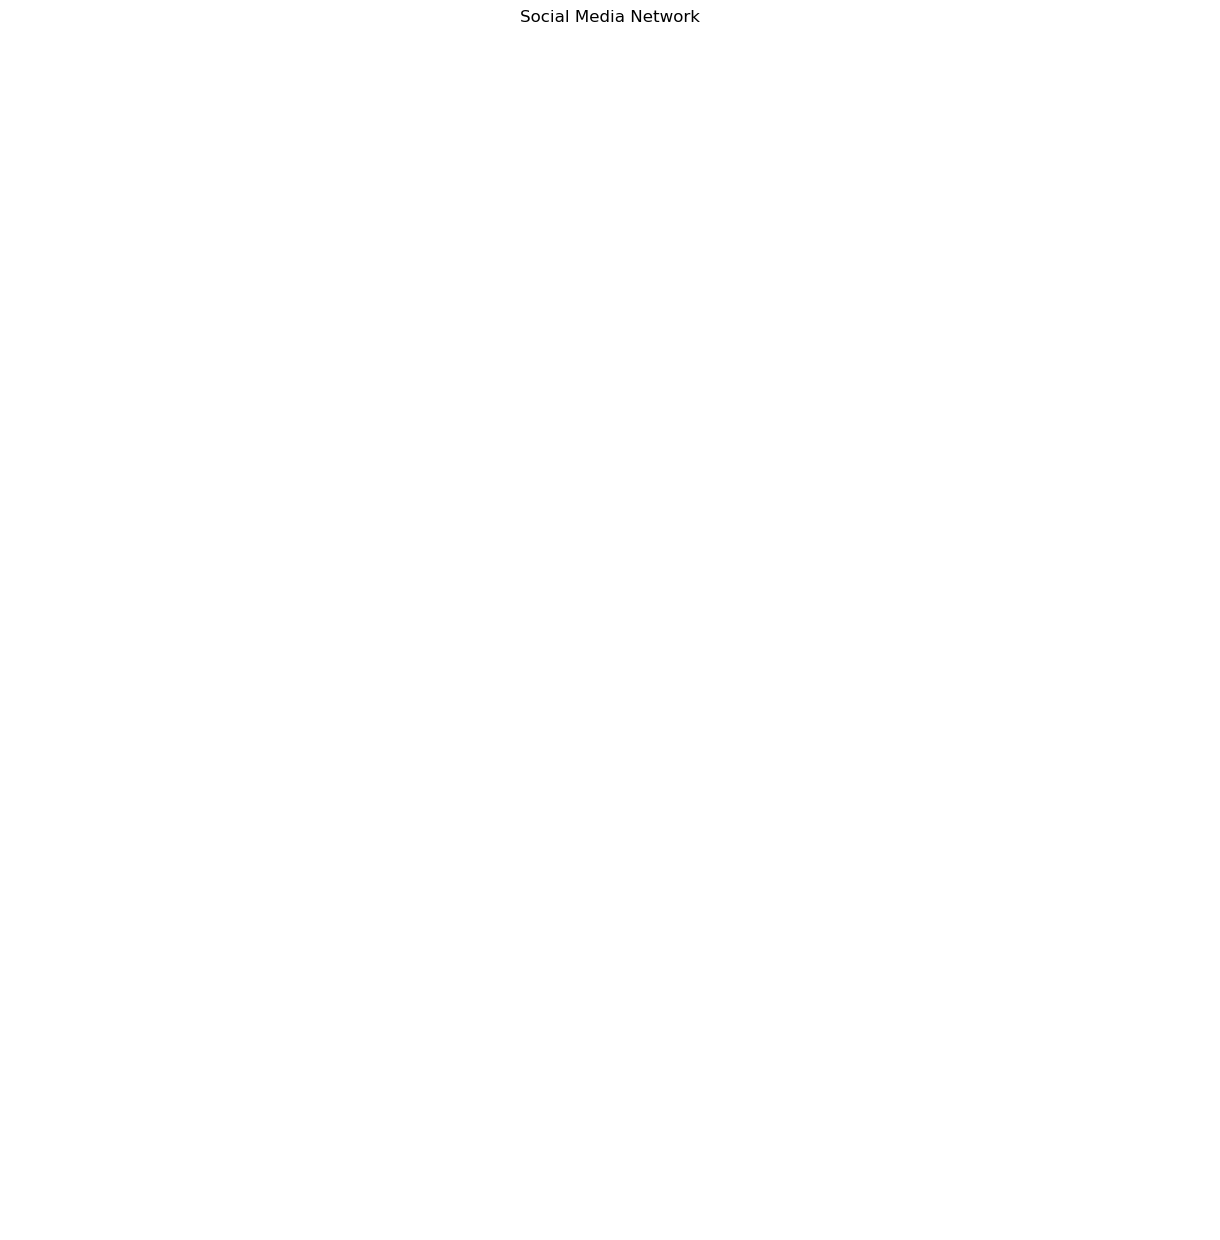

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load datasets
breastfeeding_df = pd.read_csv('Breastfeeding_3months_.csv')
formulamilk_df = pd.read_csv('FormulaMilk_3months_.csv')

# Print column names and first few rows for inspection
print("Breastfeeding Data Columns:", breastfeeding_df.columns)
print(breastfeeding_df.head())

print("\nFormula Milk Data Columns:", formulamilk_df.columns)
print(formulamilk_df.head())

# Add category to each dataset
breastfeeding_df['Category'] = 'Breastfeeding'
formulamilk_df['Category'] = 'FormulaMilk'

# Combine datasets
combined_df = pd.concat([breastfeeding_df, formulamilk_df])

# Print combined dataframe columns
print("\nCombined Data Columns:", combined_df.columns)

# Create graph
G = nx.Graph()

# Iterate over rows and add edges to the graph
for index, row in combined_df.iterrows():
    user = row.get('UserID', None)  # Use .get() to avoid KeyError
    category = row.get('Category', None)
    interactions = row.get('Interactions', 0)
    
    if user is None or category is None:
        continue
    
    G.add_node(user, category=category)
    
    # Add edges to users within the same category
    for target_user in combined_df.loc[combined_df['Category'] == category, 'UserID']:
        if user != target_user:
            G.add_edge(user, target_user, weight=interactions)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Print top users by centrality measures
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 Users by Degree Centrality:")
print(sorted_degree_centrality[:5])

print("\nTop 5 Users by Betweenness Centrality:")
print(sorted_betweenness_centrality[:5])

print("\nTop 5 Users by Closeness Centrality:")
print(sorted_closeness_centrality[:5])

# Visualize the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=50, edge_color='gray', font_size=10)
plt.title('Social Media Network')
plt.show()
